<font color="blue"><b><h1 style="font-size:4em; font-family:serif"><center>GALACTIC DYNAMO</center></h1></b>

This project is a part of the term project given in course P464 Plamsa Physics and Magnetohydrodynamics taught in Spring 2024 at NISER Bhubaneswar.

Submitted by: <u>Chandan Kumar Sahu</u>, Integrated MSc. SPS batch 19

Supervised by: Dr. Luke R. Chamandy, SPS, NISER



# Contents
1. Problem Statement
2. Introduction
3. Theory
    1. Derivation of necessary equations
4. Numerical solution to Galactic Magnetic Fields
    1. Numerical solution
    2. Magnetic field evolution with free boundary conditions
    3. Isolated boundary conditions

# 1 - Problem Statement

Solve the diffusion equation in the z-direction.
* Explore the evolution of the magnetic field magnitude and of the exponential decay rate.
* Explore the evolution of the spatial solution for $B_r$ and $B_\phi$, and of the pitch angle of the mean magnetic field p.
* Explore how different boundary conditions affect the results.
* Explore how different seed fields affect the results.

# 1 - Introduction

Write something here

# 2 - Theory

Write something here

### 2.1 - The mean-field induction equation

We have the mean-field induction equation as 
$$ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = \nabla \times \left[ \bar{\mathbf{V}} \times \bar{\mathbf{B}} + \mathcal{E} - \eta \left( \nabla \times \bar{\mathbf{B}} \right) \right] $$
where $\mathcal{E} = \left( \alpha \bar{\mathbf{B}} \right) - \eta_t \left( \nabla \times \bar{\mathbf{B}} \right)$

We will solve the equations in the cylindrical coordinates (r, $\phi$, z) with the origin at the galactic centre and the z-axis parallel to the galactic angular velocity. However, to simplify things, lets make some approximations.

1. Omit the terms involving $\bar{\mathbf{V}} \times \bar{\mathbf{B}}$ and $\alpha$. We will land up on just the diffusion equation.
$$ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = - \nabla \times \left[ \eta_T \left( \nabla \times \bar{\mathbf{B}} \right) \right] $$
where $\eta_T = \eta + \eta_t$

2. Take $\eta_T$ independent of $\bar{\mathbf{B}}$. Our equation becomes
$$ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = - \eta_T \left[ \nabla \times \left( \nabla \times \bar{\mathbf{B}} \right) \right] $$
But $\nabla \times \left( \nabla \times \bar{\mathbf{B}} \right) = \nabla \left( \nabla \cdot \bar{\mathbf{B}} \right) - \nabla^2 \bar{\mathbf{B}} $ and $\nabla \cdot \bar{\mathbf{B}} = 0$ (Gauss's Law), so we finally have
$$ \boxed{ \dfrac{\partial \bar{\mathbf{B}}}{\partial t} = \eta_T \nabla^2 \bar{\mathbf{B}} }$$

This is the Fickian diffusion equation. We will solve this equation numerically.


### 2.2 - Solving in cylindrical coordinates

In cylindrical coordinates, the $\nabla^2B$ becomes

$$ \begin{aligned}
\nabla^2 \mathbf{\bar{B}} = & \left[ \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_r \right) \right) + \frac{1}{r^2} \frac{\partial^2 \bar{B}_r}{\partial \phi^2} + \frac{\partial^2 \bar{B}_r}{\partial z^2} - \frac{2}{r^2} \frac{\partial \bar{B}_\phi}{\partial \phi} \right] \mathbf{\hat{r}} \\
& + \left[ \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_\phi \right) \right) + \frac{1}{r^2} \frac{\partial^2 \bar{B}_\phi}{\partial \phi^2} + \frac{\partial^2 \bar{B}_\phi}{\partial z^2}+\frac{2}{r^2} \frac{\partial \bar{B}_r}{\partial \phi} \right] \mathbf{\hat{\phi}} \\
& + \left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \frac{\partial \bar{B}_z}{\partial r}\right)+\frac{1}{r^2} \frac{\partial^2 \bar{B}_z}{\partial \phi^2}+\frac{\partial^2 \bar{B}_z}{\partial z^2}\right] \mathbf{\hat{z}} 
\end{aligned} $$

So we get the final component-wise equations as
$$ \mathbf{\bar{B}} = \bar{B}_r \mathbf{\hat{r}} + \bar{B}_{\phi} \mathbf{\hat{\phi}} + \bar{B}_z \mathbf{\hat{z}} $$

$$ \begin{aligned}
    \frac{\partial \bar{B}_r}{\partial t} &= \eta_T \left[ \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_r \right) \right) + \frac{1}{r^2} \frac{\partial^2 \bar{B}_r}{\partial \phi^2} + \frac{\partial^2 \bar{B}_r}{\partial z^2} - \frac{2}{r^2} \frac{\partial \bar{B}_\phi}{\partial \phi} \right] \\
    \frac{\partial \bar{B}_\phi}{\partial t} &= \eta_T \left[ \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_\phi \right) \right) + \frac{1}{r^2} \frac{\partial^2 \bar{B}_\phi}{\partial \phi^2} + \frac{\partial^2 \bar{B}_\phi}{\partial z^2}+\frac{2}{r^2} \frac{\partial \bar{B}_r}{\partial \phi} \right] \\
    \frac{\partial \bar{B}_z}{\partial t} &= \eta_T \left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \frac{\partial \bar{B}_z}{\partial r}\right)+\frac{1}{r^2} \frac{\partial^2 \bar{B}_z}{\partial \phi^2}+\frac{\partial^2 \bar{B}_z}{\partial z^2}\right] 
\end{aligned} $$

Since the problem statement in the project aims to solve only in the z-direction, we remove all radial or azimuthal variations of the magnetic field $\left(\dfrac{\partial }{\partial r} = \dfrac{\partial }{\partial \phi} = 0 \right)$. 

We are now left with these simple equations to solve, i.e., the Fickian diffusion equations.
$$ \boxed{ \frac{\partial \bar{B}_r}{\partial t} = \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} } \qquad \qquad \qquad \boxed{ \frac{\partial \bar{B}_\phi}{\partial t} = \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} } \qquad \qquad \qquad \boxed{ \frac{\partial \bar{B}_z}{\partial t} = \eta_T \frac{\partial^2 \bar{B}_z}{\partial z^2} } $$



### 2.3 - Calculation of total magnetic field magnitude ($B_{total}$) and pitch angle ($p_B$)

We can calculate the magnitude of the total magnetic field as 
$$ B_{\text{total}} = \sqrt{\bar{B}_r^2 + \bar{B}_\phi^2} $$
And $$ p_B = \tan^{-1} \left( \dfrac{\bar{B}_r}{\bar{B}_\phi} \right) \qquad \qquad \text{where} \qquad -\dfrac{\pi}{2} < p_B < \dfrac{\pi}{2}$$

### 2.4 - Decay constant

The diffusion of the total magnetic field can be expressed in the form

$$ B_{\text{total}}(z, t) = \tilde{B}(r)\exp(-\gamma t) $$ 
where $\tilde{B}(r)$ contains all the variation in $r$ and the exponential factor contains time variation, where $\gamma$ is the magnetic decay constant.

Our final goal is to calculate this $\gamma$.

# 3 - Numerical Solution to Galactic magnetic Fields



Now we begin to solve the diffusion equations numerically.

We will first solve the heat diffusion equation, and use them to calculate the total $B_{\text{total}}$ and the pitch angle $p_B$. Finally we will calculate the decay constant $\gamma$.


#### Solver - Crank-Nicholson
The Crank-Nicholson method is a numerical technique commonly used to solve partial differential equations, particularly for problems involving heat diffusion. It combines implicit and explicit schemes, resulting in a stable and accurate solution. By averaging the values of variables at current and next time steps, it reduces numerical errors and suppresses oscillations. The method is unconditionally stable, allowing for larger time steps compared to explicit methods, and is second-order accurate in time and space. This makes it well-suited for simulating heat diffusion processes with high accuracy and efficiency.

Now we define the Crank-Nicholson semi-implicit algorithm to find the solution.
This algorithm is very stable compared to other explicit methods such as Runge-Kutta or Euler methods.
Here we take the normalized boundaries, i.e., the values have been normalized to $-1<z<1$

We now define the plotting function

We now move to the solution. 

### 3.3 - Magnetic field evolution with free boundary conditions

Boundary conditions are essential in defining the behavior of physical systems, particularly in fields like physics and engineering. Two common types of boundary conditions are vacuum boundary conditions (BC) and isolated boundary conditions.

#### Vacuum Boundary Conditions (BC):
In vacuum boundary conditions, the system is assumed to be in contact with a perfect vacuum, meaning there is an absence of any material or fields outside the system. This implies that there are no external influences or interactions beyond the boundaries of the system under consideration. Vacuum boundary conditions are often utilized in computational simulations or theoretical models where the effects of external factors are negligible or can be ignored. These conditions simplify the analysis by eliminating external perturbations, focusing solely on the behavior within the system.

#### Isolated Boundary Conditions:
Isolated boundary conditions imply that the system is completely isolated from its surroundings, meaning there are no exchanges of matter or energy across its boundaries. In other words, the system is self-contained and does not interact with its external environment. Isolated boundary conditions are commonly encountered in thermodynamics and statistical mechanics, where the focus is on studying the intrinsic properties and behavior of the system without external influences. These conditions help in analyzing the equilibrium state and dynamics of isolated systems, providing insights into their thermodynamic properties and phase transitions.

Both vacuum and isolated boundary conditions play crucial roles in various scientific and engineering disciplines, enabling researchers to understand and predict the behavior of complex systems under different circumstances.


### Defining the grid and associated values
$z$: The typical thickness of a thin disk is ~200 pc. For solving numerically, we normalize the spatial grid to -1 to 1, hence $-1<z<1$. 

For $\eta_T$, we need to calculate its value in he normlization units.
$$ \eta_T \approx \dfrac{1}{3} \tau v_{\text{rms}}^2 $$

We have, for a typical galaxy, $\tau \approx 10$ Myr and $v_{\text{rms}} \approx 10^4$ km/s
$$ \begin{aligned}
\eta_T &= \dfrac{1}{3} \times 10 \text{ Myrs} \times (10 \text{ km/s})^2 \\
&= \dfrac{100}{3} \times \text{ Myrs} \times  \dfrac{\text{ km}^2}{\text{s}^2} \\
&= \dfrac{100}{3} \times \text{ Myrs} \times  \left( \dfrac{\text{ km} \times 100 \text{ pc}}{3.086\times 10^{15}\text{ km}} \right)^2 \left(\dfrac{3.154\times 10^{13} \text{ s}}{\text{s} \times \text{Myr}} \right)^2 \\
&= \dfrac{100}{3} \times \left( \dfrac{3.154\times 10^{13}}{3.086\times 10^{15}} \right)^2 \times \text{ (100 pc)}^2/\text{ Myr} \\
&= 3.48 \times 10^{-3}\text{ (100 pc)}^2/\text{ Myr}
\end{aligned} $$

Hence, we use the following values
$$ -1<z<1 \qquad \qquad \text{ and } \qquad \qquad \eta_T = 3.48 \times 10^{-3}\text{ (100 pc)}^2/\text{ Myr} $$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from my_code import *
from plotting import *
from make_GIFs import *

# Example 1

### Defining the initial condition

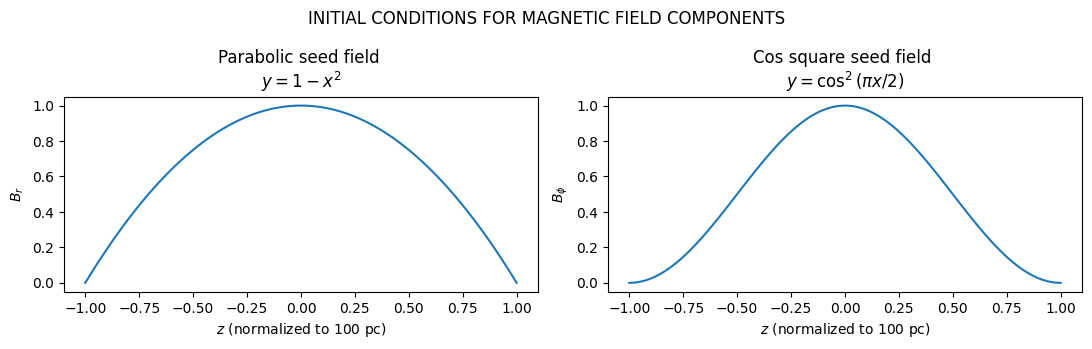

In [2]:
def init_cond_Br(x):
    return 1-x**2

def init_cond_Bphi(x):
    return np.cos(np.pi/2*x)**2

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)
title_1 = r'Parabolic seed field '+'\n'+r'$ y = 1-x^2$'
title_2 = r'Cos square seed field '+'\n'+r'$ y = \cos^2(\pi x/2)$'

plot_init_cond(z, init_cond_Br, init_cond_Bphi, title_1, title_2)
plt.show()

### Solving the diffusion equation

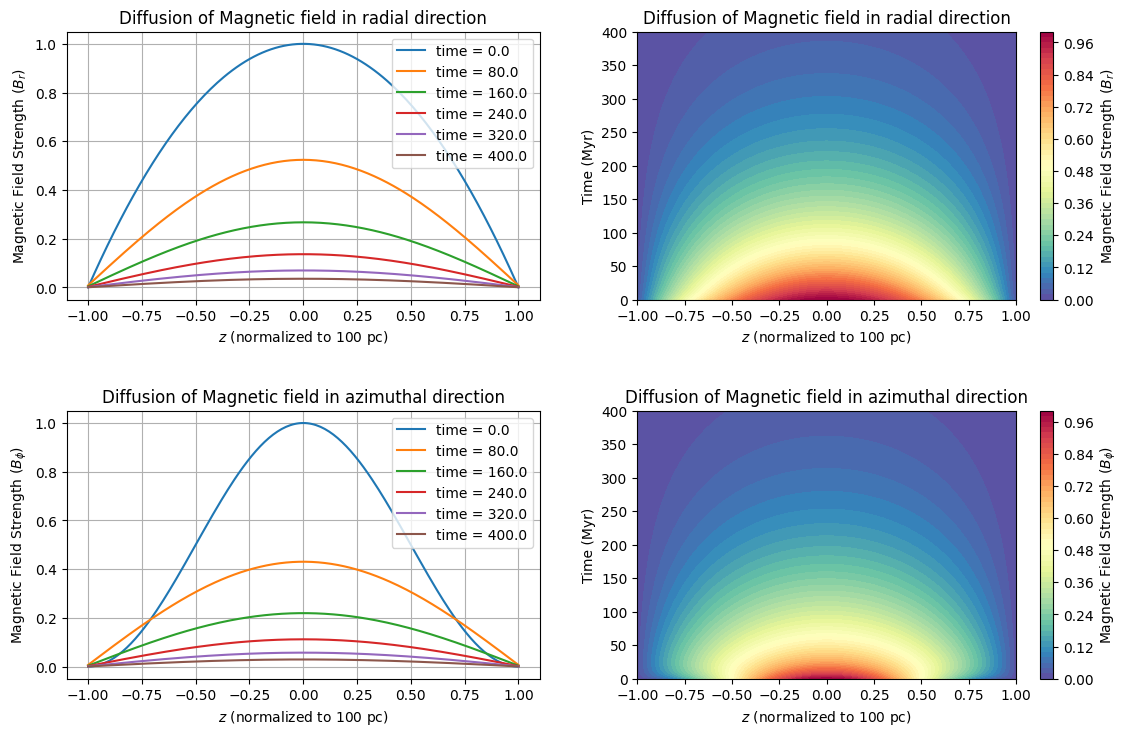

In [3]:
# Constants and parameters
eta_T = 3.48e-3    # magnetic diffusivity
t_max = 400     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = 1       # time step
dz = 0.01       # spatial step in z direction

# Solve the diffusion equation in radial direction
solution_r, spatial_grid, time_grid = crank_nicolson_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Br, source_term, diff_matrix_free_boundary)
# Solve the diffusion equation in azimuthal direction
solution_phi, spatial_grid, time_grid = crank_nicolson_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Bphi, source_term, diff_matrix_free_boundary)

# Plot the diffusion equation solution
plot_diff(time_grid, spatial_grid, solution_r, solution_phi)
plt.show()


### Calculation of magnitude of $B_{\text{total}}$ and pitch angle


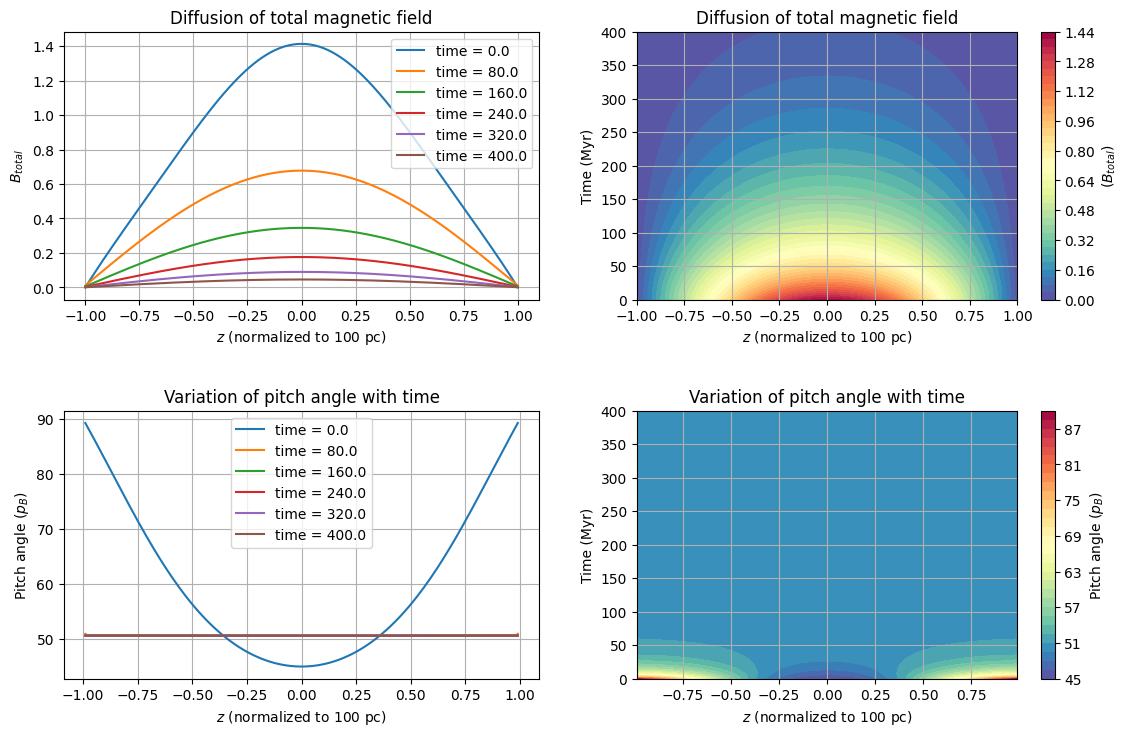

In [4]:
B_total, pitch = get_B_and_pitch(solution_r, solution_phi)

# Plot the total magnetic field and the pitch angle
plot_pitch(time_grid, spatial_grid, B_total, pitch)
plt.show()


### Decay rate calculation

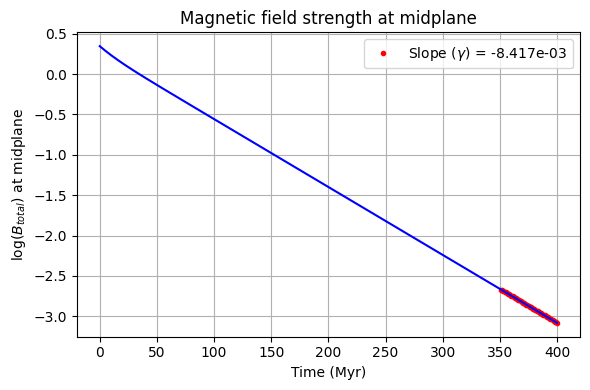

In [5]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(spatial_grid)/2), :])
m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)

plot_decay(time_grid, B_mid, m, c)
plt.show()


So the value of magnetic decay rate or decay constant obtained for this case is $\gamma = -8.417 \times 10^{-3}$

# Example 2

#### 3.3.2 - Antisymmetric initial condition
Now let us start with an anti-symmetric case, where $B_z (z<0) = -B_z (z>0)$. We can use derivative of gaussian profile as shown in the figure below. Here, the magnetic field is zero at the midplane and but has positive and negative magnitudes in the upper and lower parts of the galactic disk respectively. 

Negative magnitudes correspond to reversal in the direction of the magnetic field.


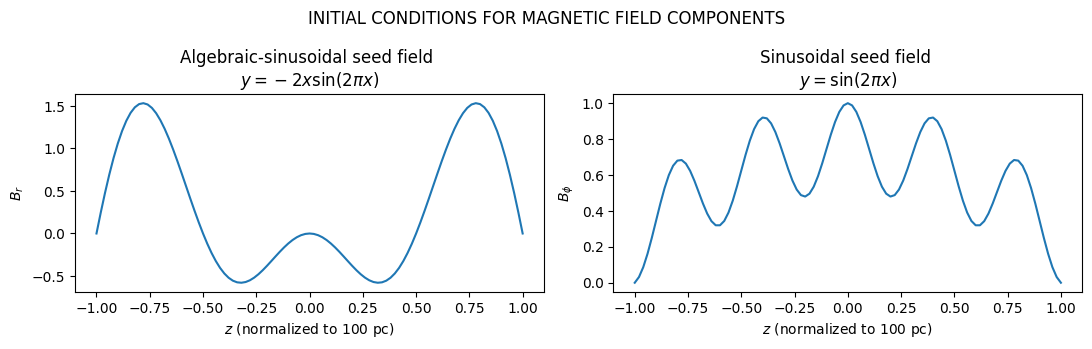

In [6]:
def init_cond_Br(x):
    return -2*x*np.sin(2*np.pi*x)

def init_cond_Bphi(x):
    return 0.75 - 0.5*x**2 + 0.25*np.cos(5*np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)
title_1 = r'Algebraic-sinusoidal seed field '+'\n'+r'$ y = -2x\sin(2\pi x)$'
title_2 = r'Sinusoidal seed field '+'\n'+r'$ y = \sin(2\pi x)$'

plot_init_cond(z, init_cond_Br, init_cond_Bphi, title_1, title_2)
plt.show()


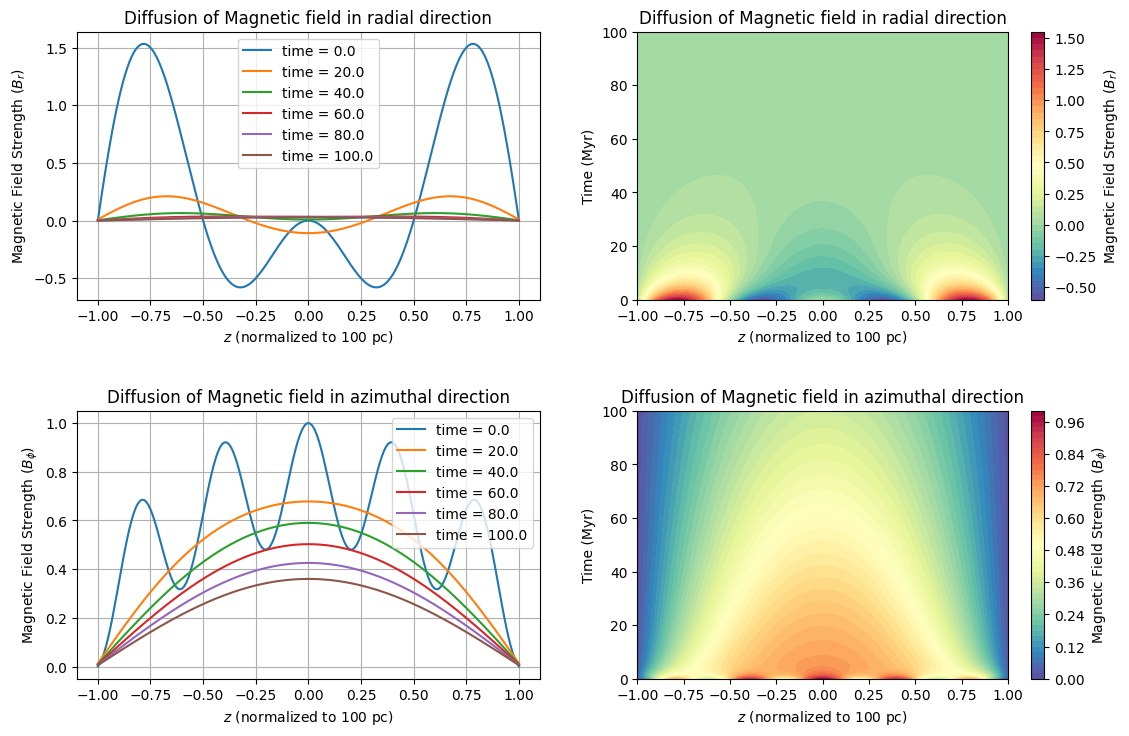

In [7]:
# Constants and parameters
eta_T = 3.48e-3    # magnetic diffusivity
t_max = 100     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = 0.1       # time step
dz = 0.01       # spatial step in z direction

# Solve the diffusion equation in radial direction
solution_r, spatial_grid, time_grid = crank_nicolson_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Br, source_term, diff_matrix_free_boundary)
# Solve the diffusion equation in azimuthal direction
solution_phi, spatial_grid, time_grid = crank_nicolson_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Bphi, source_term, diff_matrix_free_boundary)

# Plot the diffusion equation solution
plot_diff(time_grid, spatial_grid, solution_r, solution_phi)

plt.show()


### Calculation of magnitude of B and pitch angle

/home/ws1/Galactic_Dynamo/my_code.py:136: RuntimeWarning: divide by zero encountered in divide
  p = np.where(np.abs(Bphi)>1e-15, 180/np.pi*np.arctan(Br/Bphi), 90)


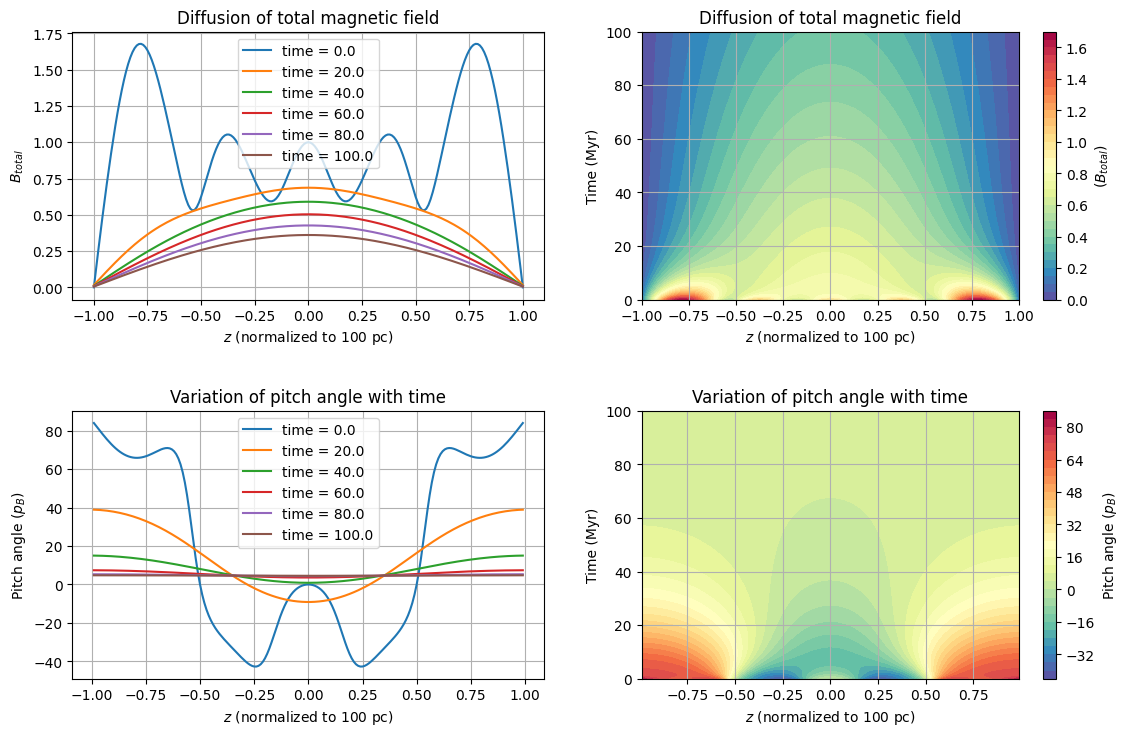

In [8]:
B_total, pitch = get_B_and_pitch(solution_r, solution_phi)

# Plot the total magnetic field and the pitch angle
plot_pitch(time_grid, spatial_grid, B_total, pitch)
plt.show()


### Decay rate calculation

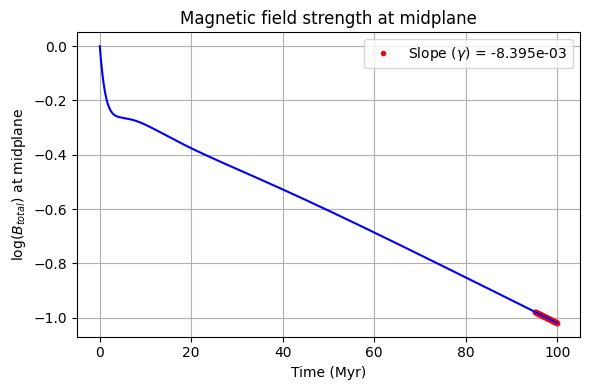

In [9]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(spatial_grid)/2), :])
m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)

plot_decay(time_grid, B_mid, m, c)
plt.show()


# Example 3

#### 3.3.3 - Arbitrary initial condition
Now let us move to a cmopletely arbitrary type of initial magnetic field. Consider the following profile

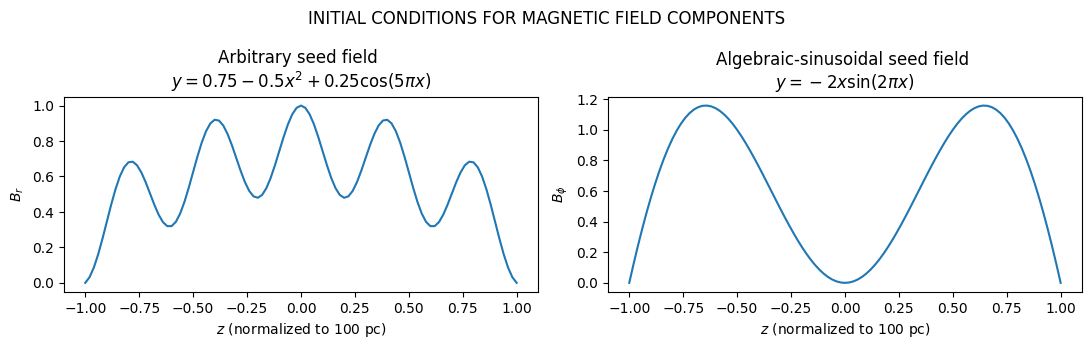

In [10]:
def init_cond_Br(x):
    return 0.75 - 0.5*x**2 + 0.25*np.cos(5*np.pi*x)

def init_cond_Bphi(x):
    return 2*x*np.sin(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)
title_1 = r'Arbitrary seed field '+'\n'+r'$ y = 0.75 - 0.5x^2 + 0.25\cos(5\pi x)$'
title_2 = r'Algebraic-sinusoidal seed field '+'\n'+r'$ y = -2x\sin(2\pi x)$'

plot_init_cond(z, init_cond_Br, init_cond_Bphi, title_1, title_2)
plt.show()


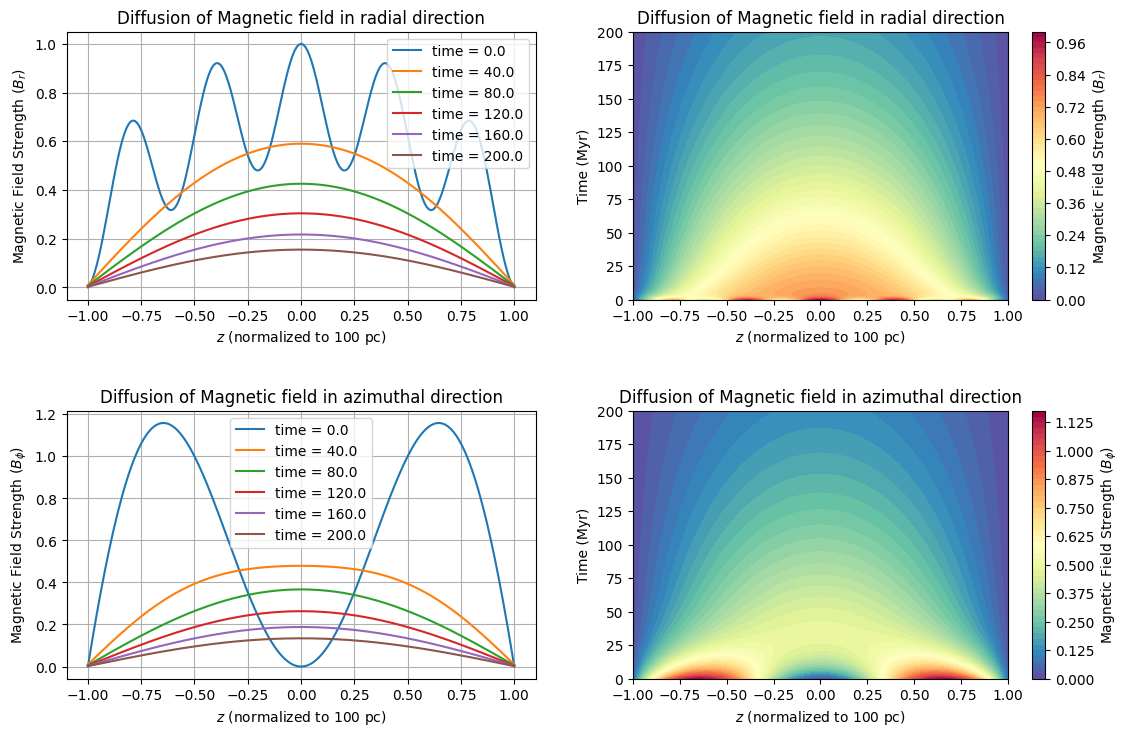

In [11]:
# Constants and parameters
eta_T = 3.48e-3    # magnetic diffusivity
t_max = 200     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = 0.5       # time step
dz = 0.01       # spatial step in z direction

# Solve the diffusion equation in radial direction
solution_r, spatial_grid, time_grid = crank_nicolson_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Br, source_term, diff_matrix_free_boundary)
# Solve the diffusion equation in azimuthal direction
solution_phi, spatial_grid, time_grid = crank_nicolson_diffusion(z_min, z_max, t_max, dz, dt, eta_T, init_cond_Bphi, source_term, diff_matrix_free_boundary)

# Plot the diffusion equation solution
plot_diff(time_grid, spatial_grid, solution_r, solution_phi)

plt.show()


### Calculation of magnitude of B and pitch angle

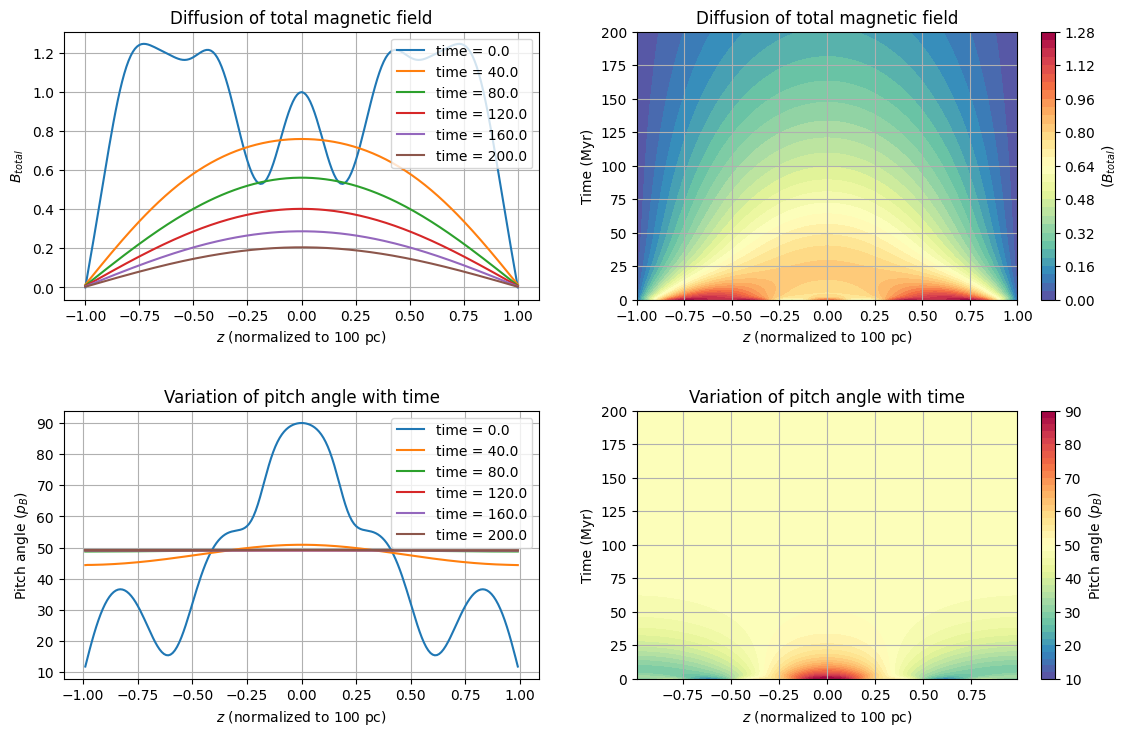

In [12]:
B_total, pitch = get_B_and_pitch(solution_r, solution_phi)

# Plot the total magnetic field and the pitch angle
plot_pitch(time_grid, spatial_grid, B_total, pitch)
plt.show()


### Decay rate calculation

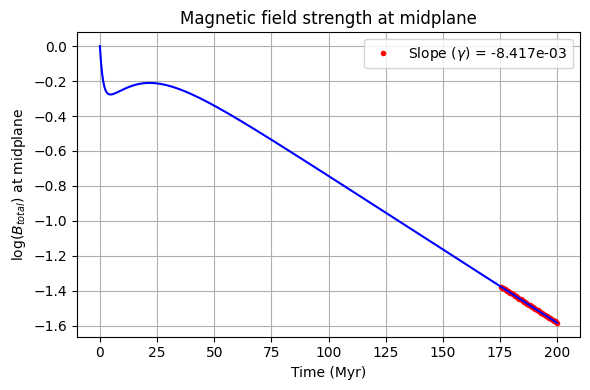

In [13]:
# Plot the decay of the magnetic field at the midplane
B_mid = np.log(B_total[int(len(spatial_grid)/2), :])
m, c = np.polyfit(time_grid[-50:], B_mid[-50:], 1)

plot_decay(time_grid, B_mid, m, c)
plt.show()


<img src="circle.gif" width="300" align="center">